measured is blue
simulated is red


/home/mgomaa/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


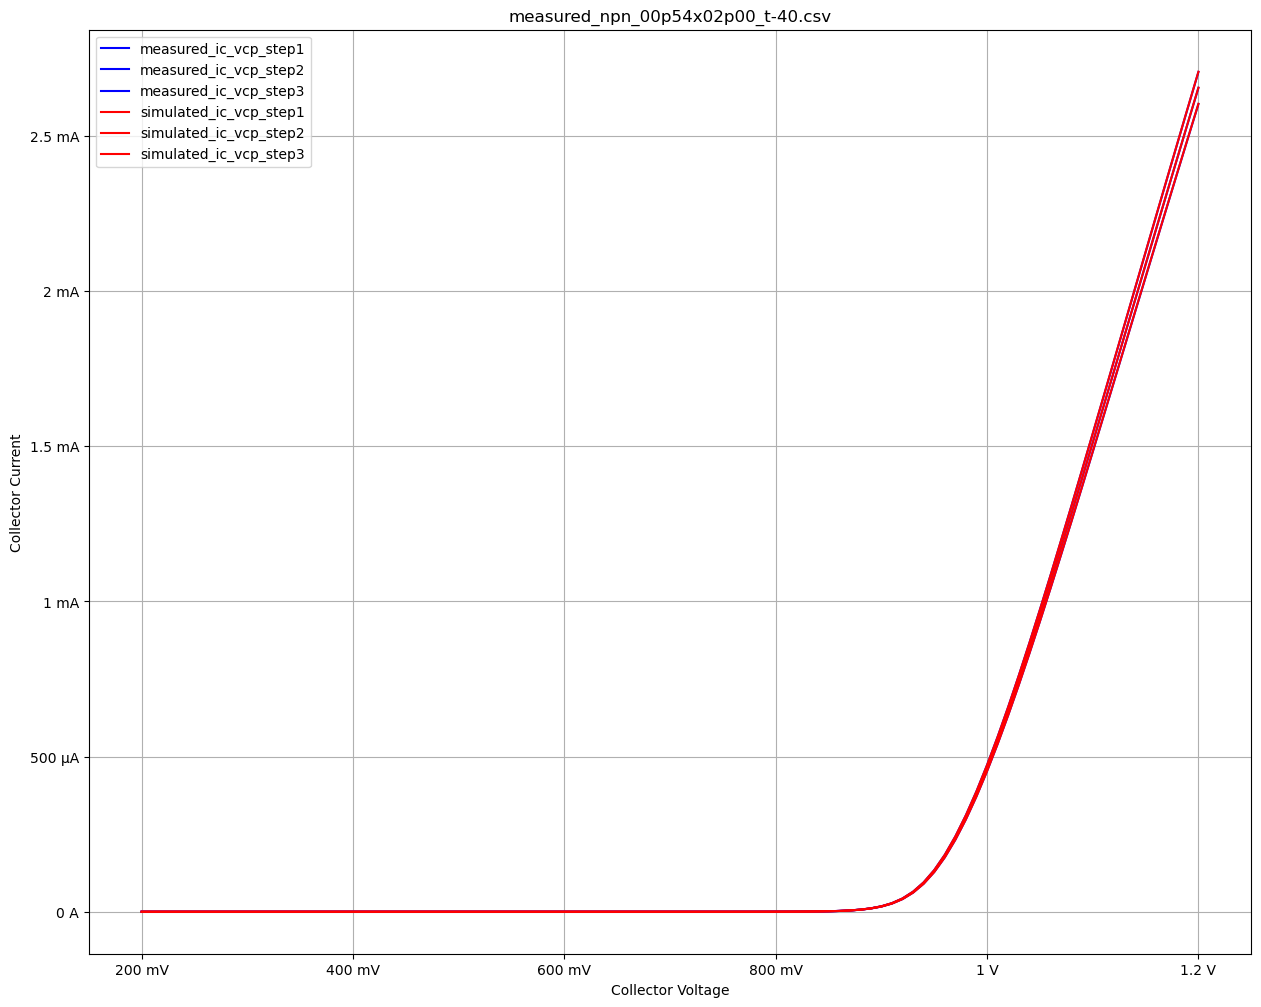

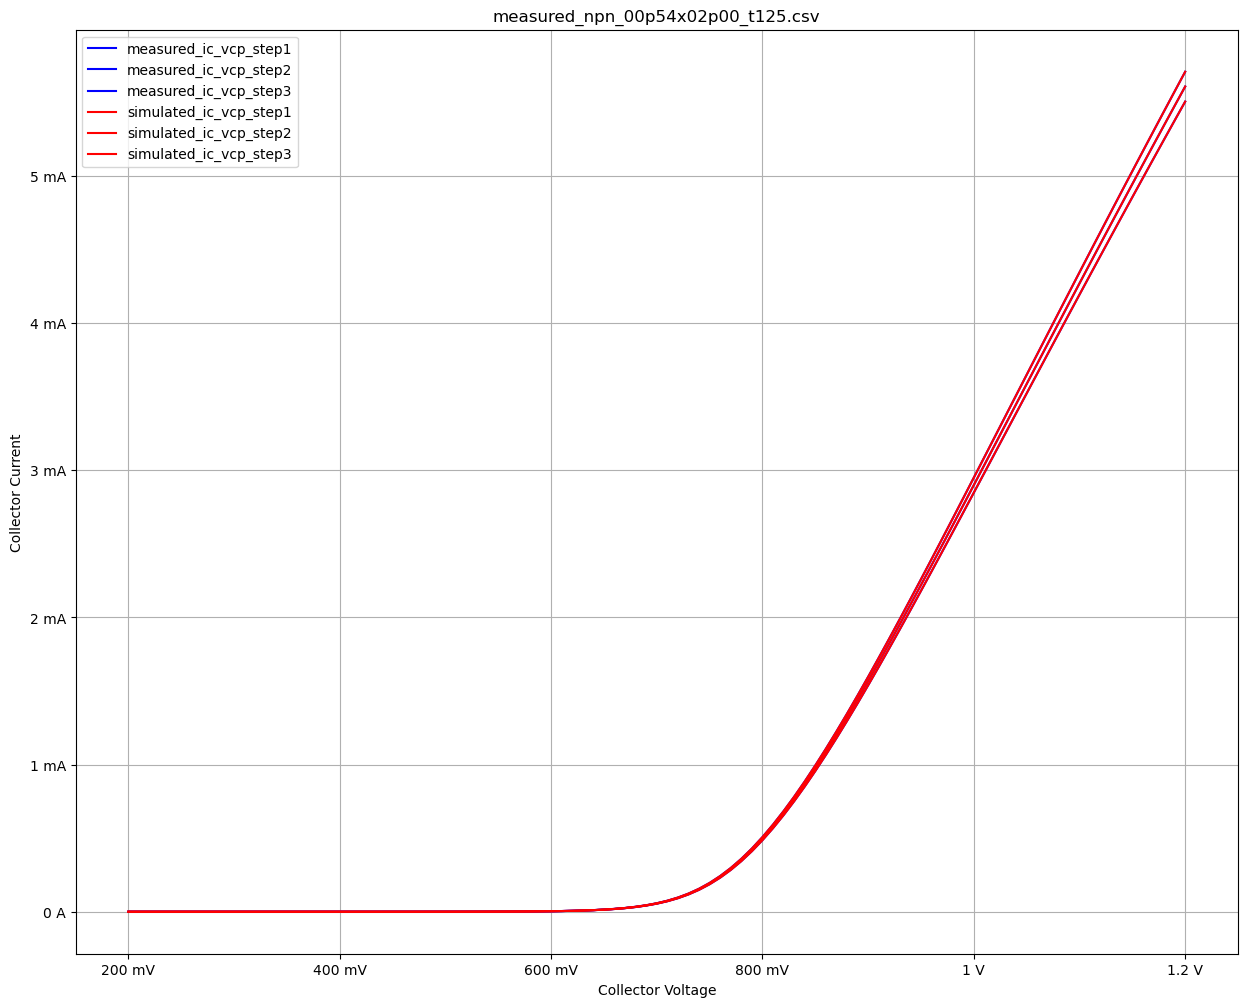

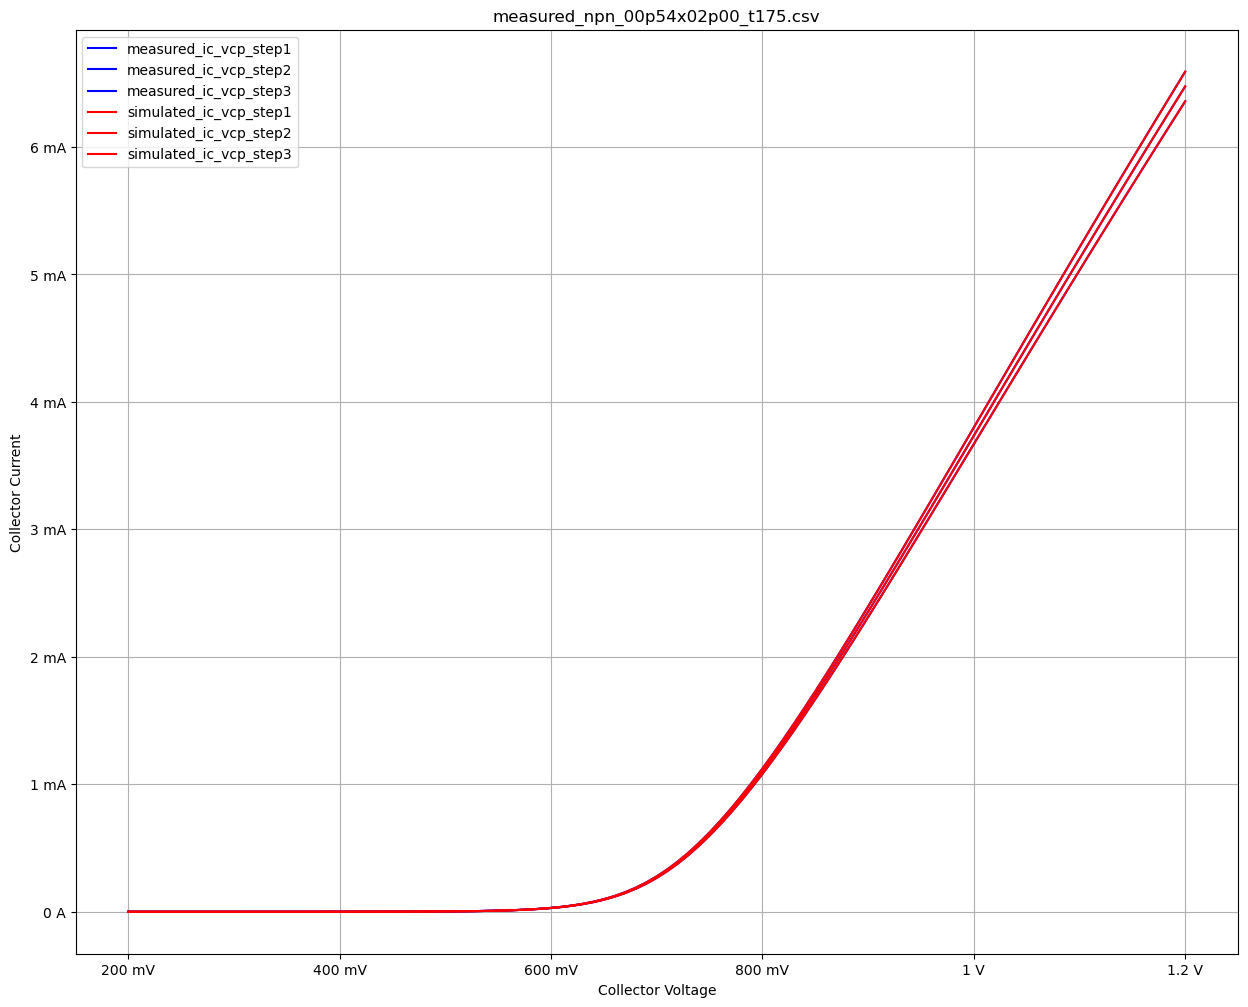

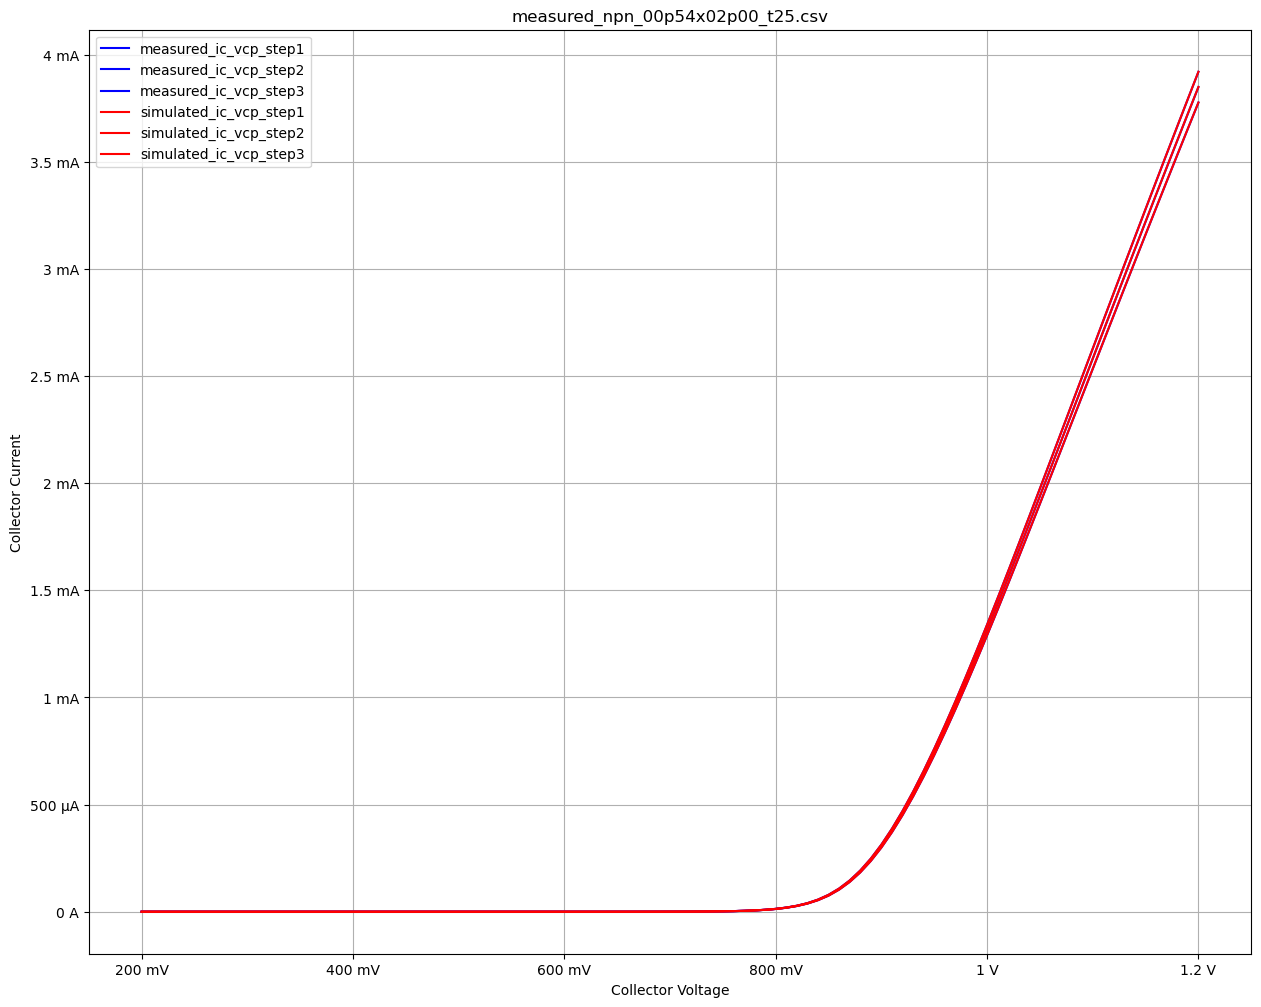

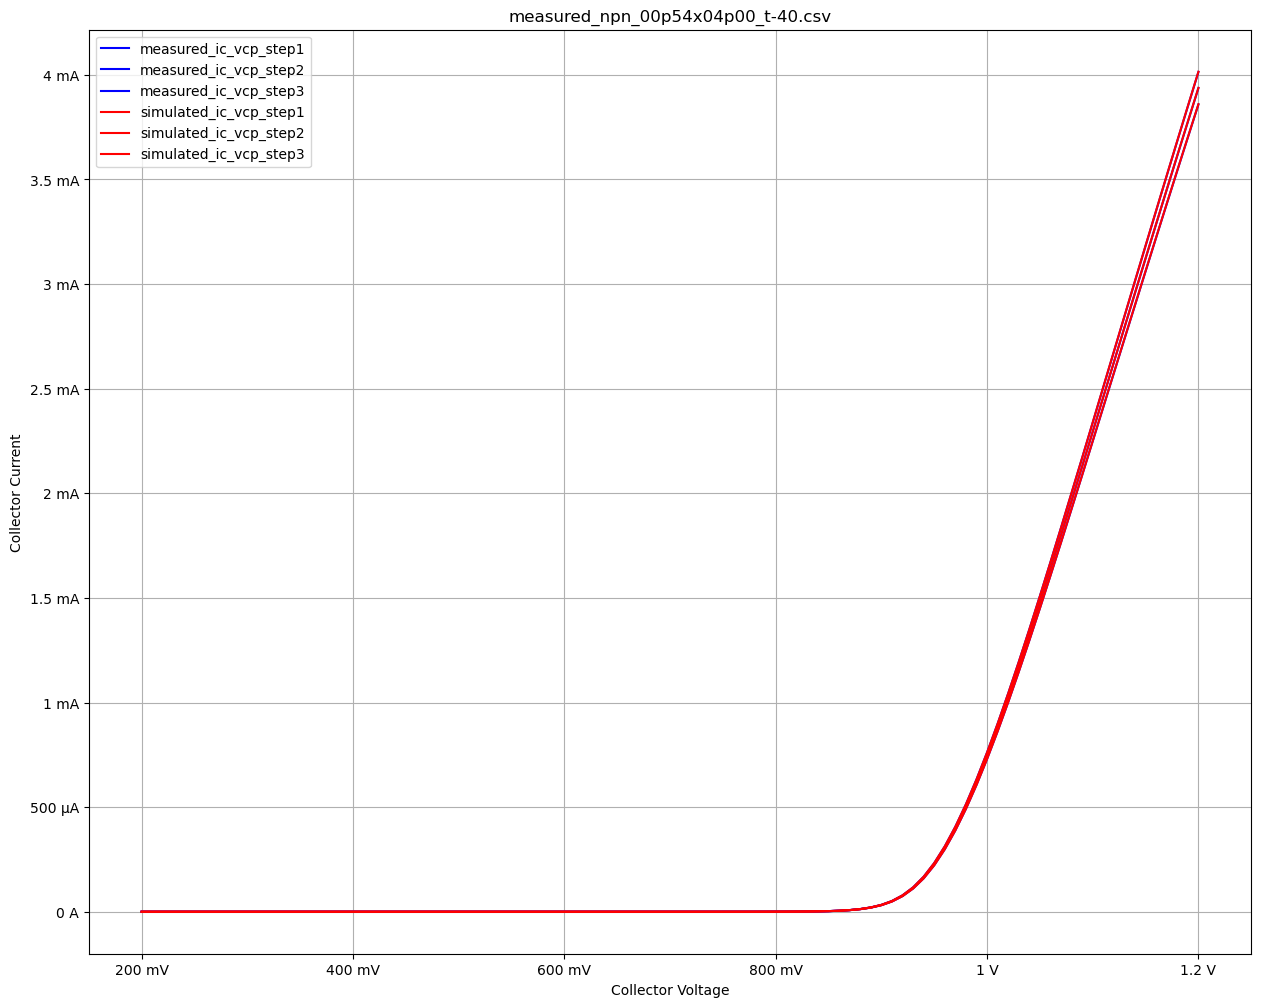

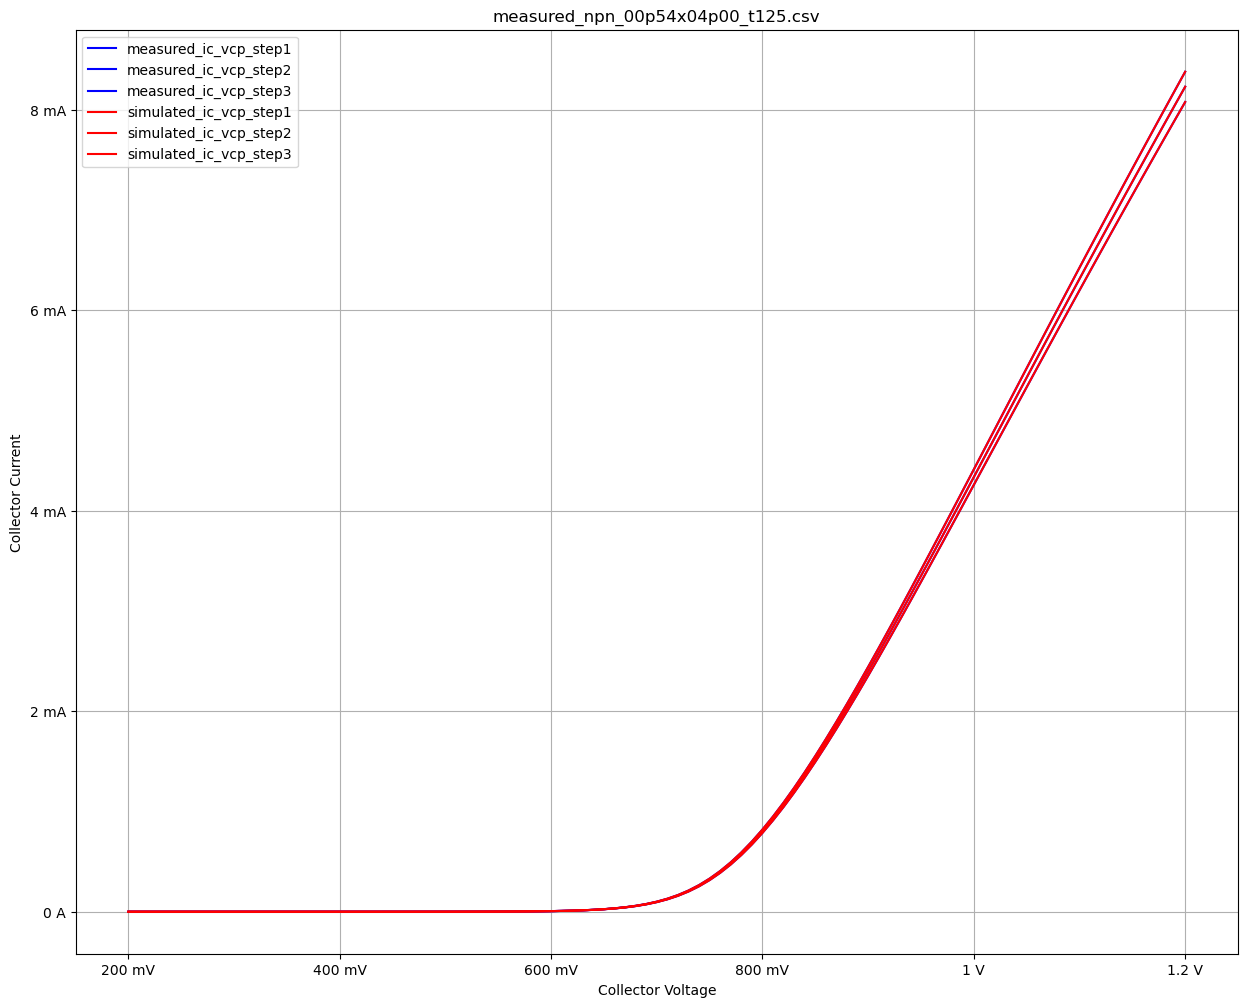

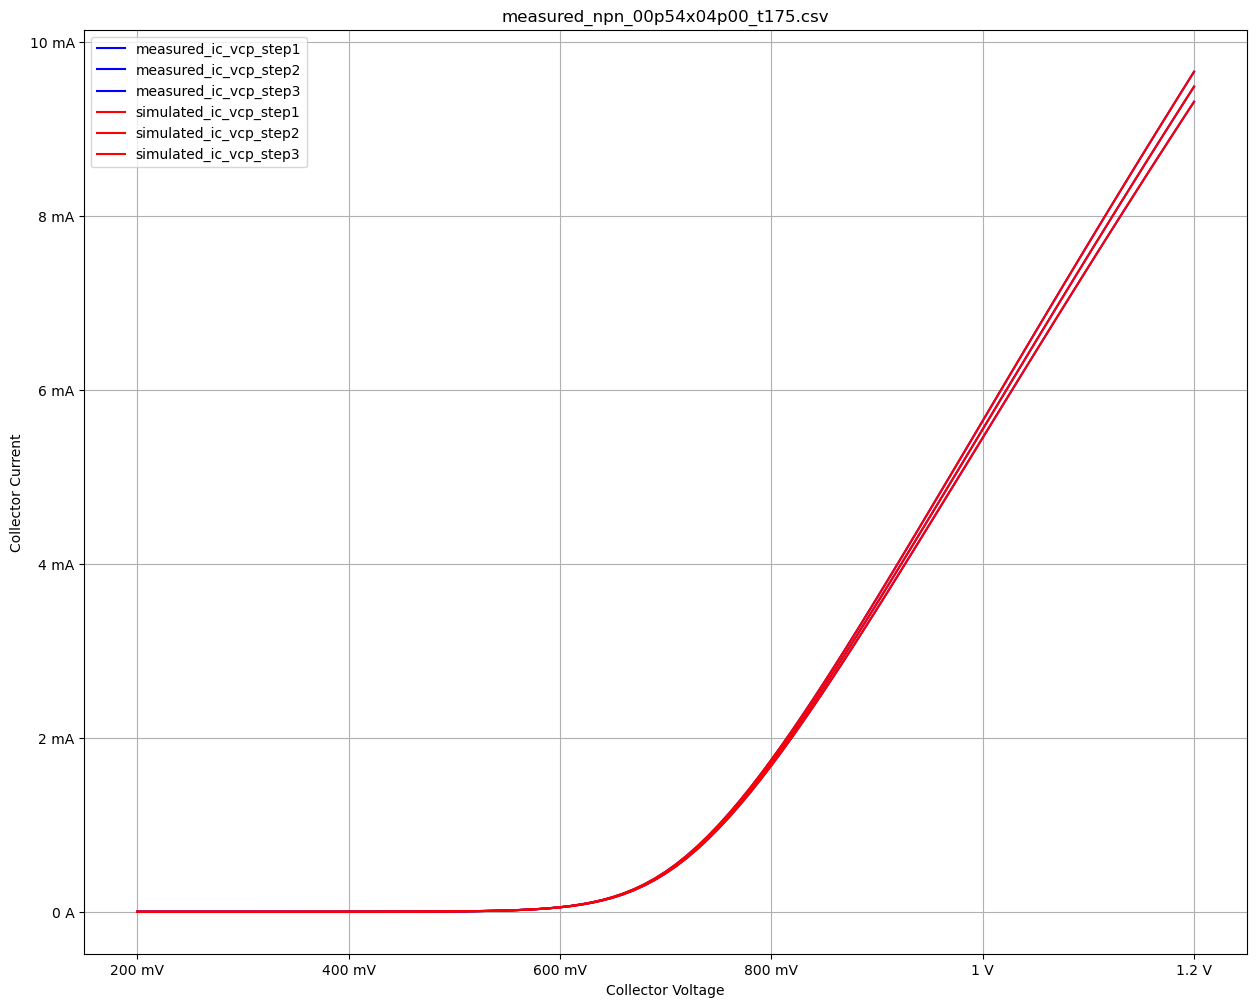

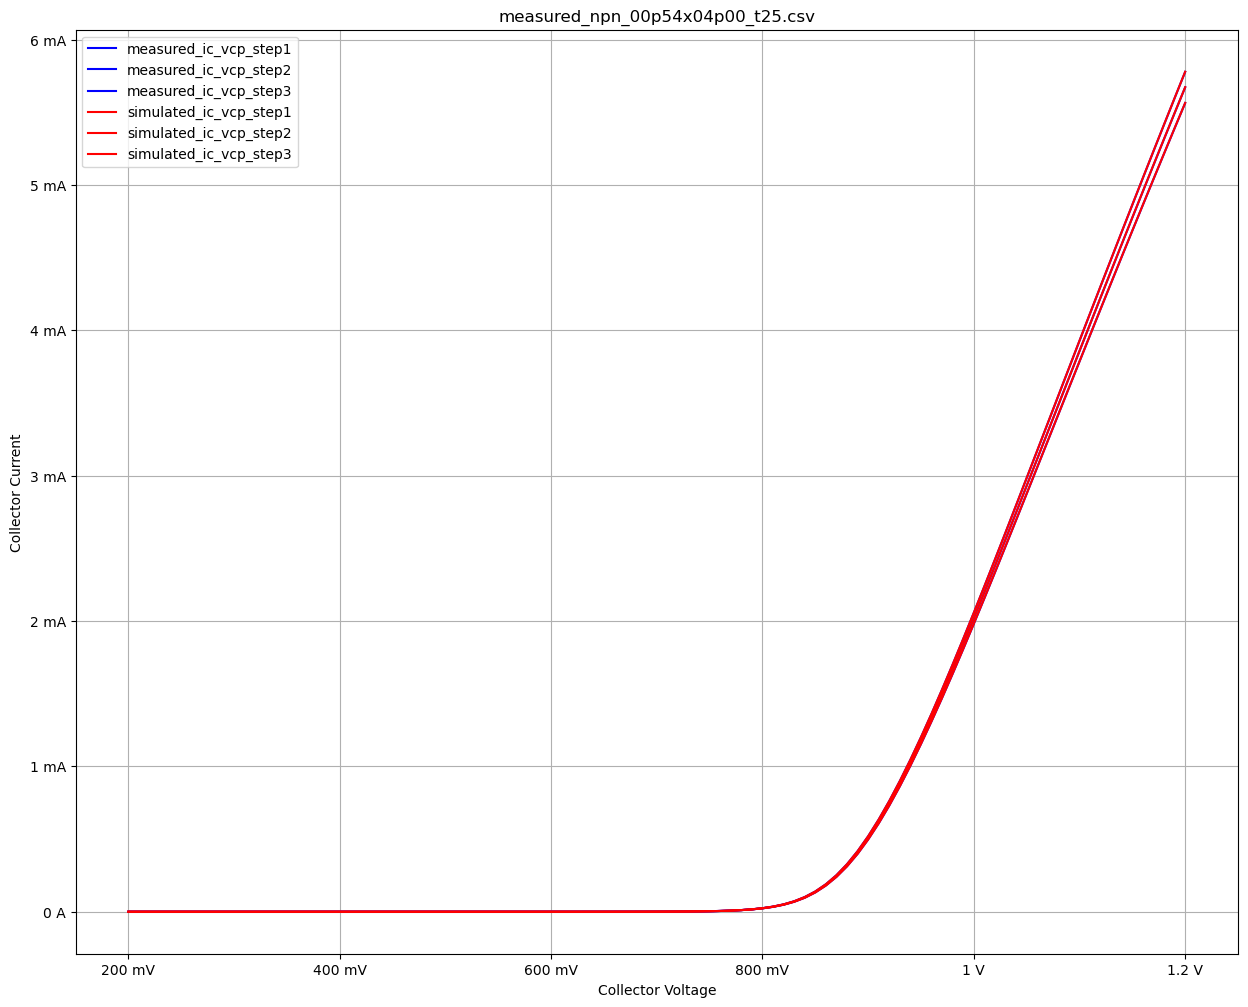

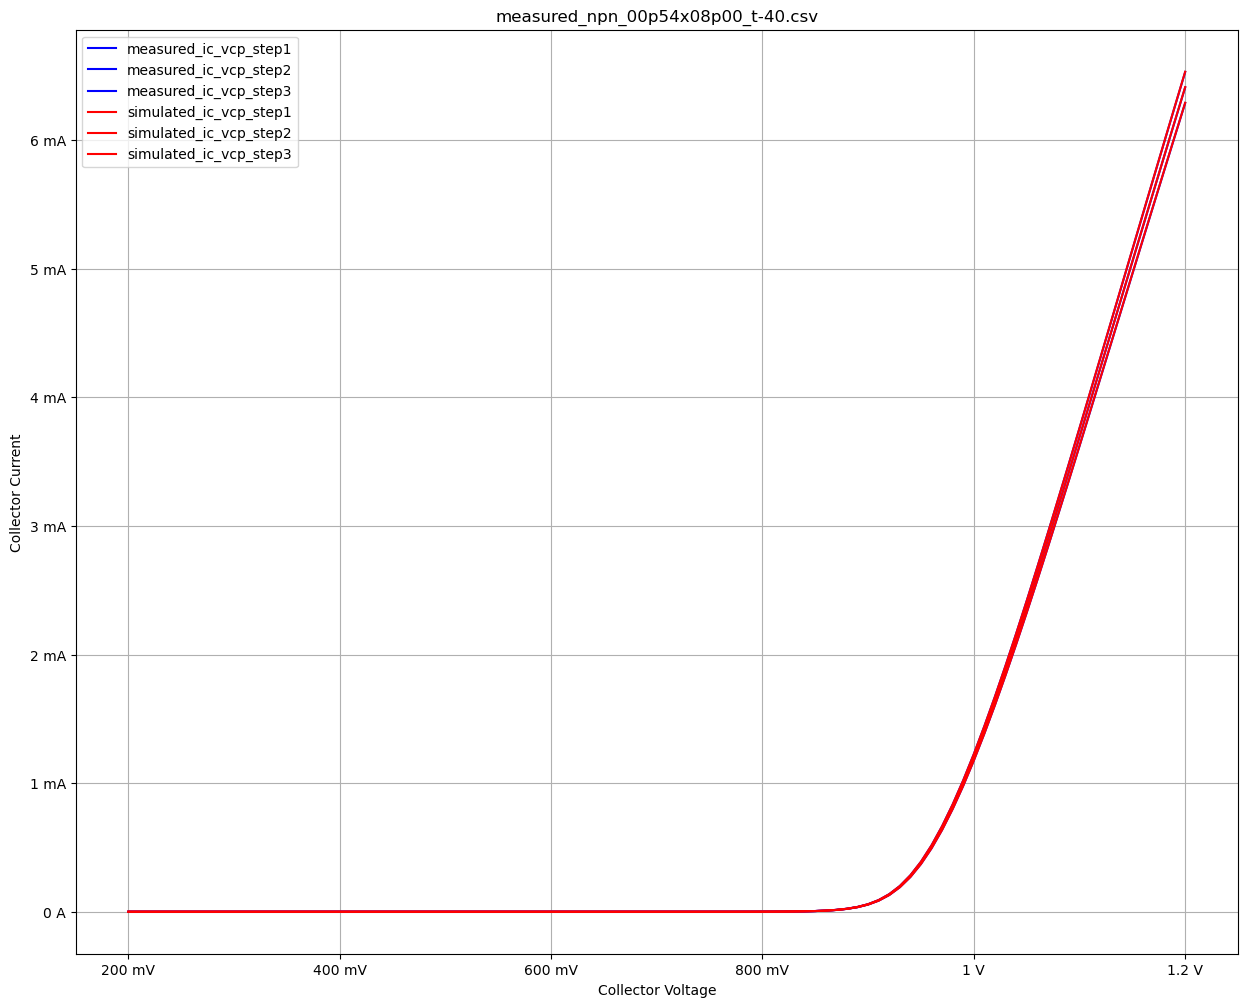

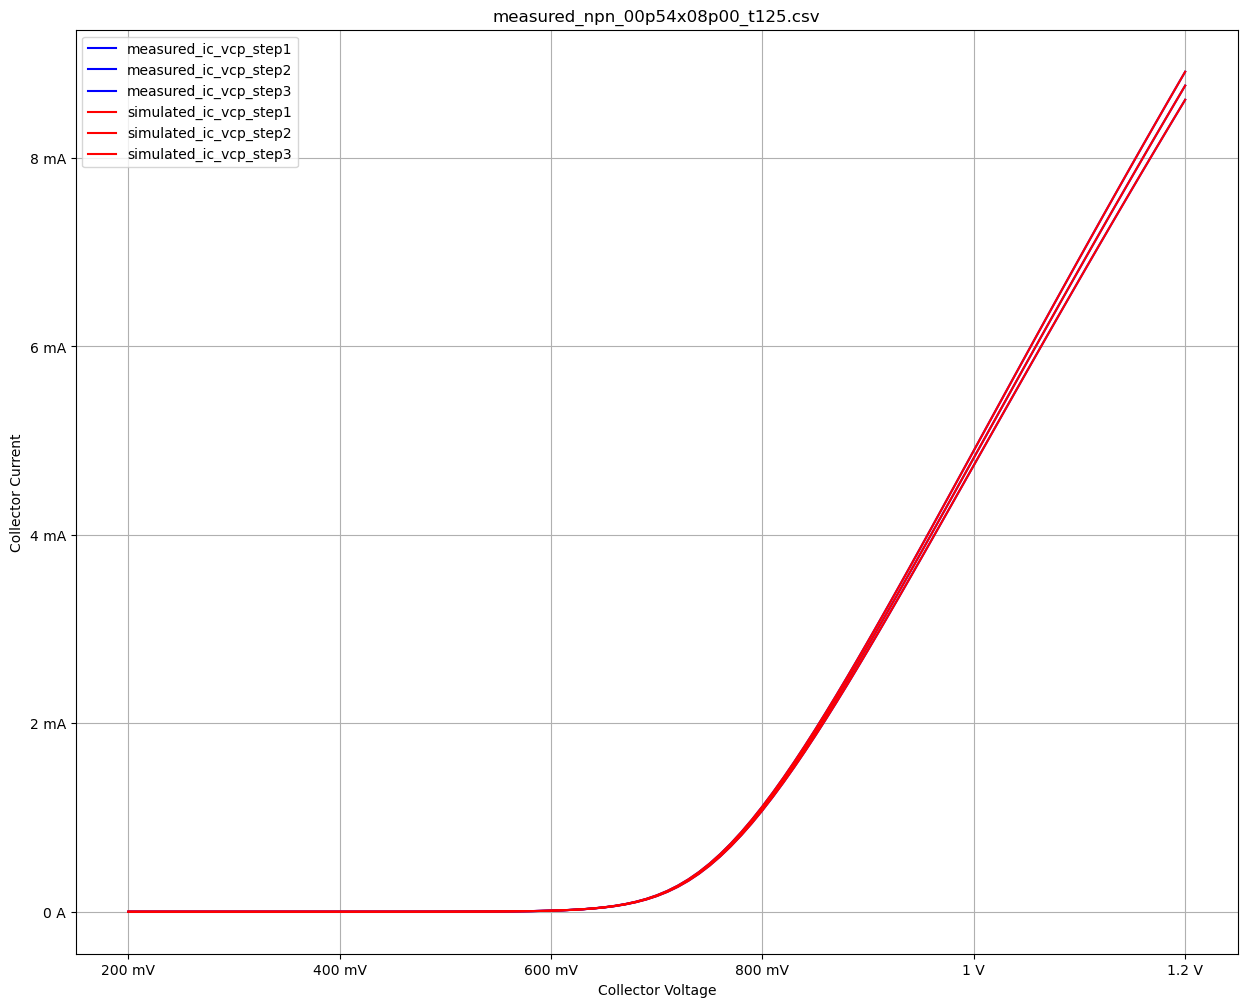

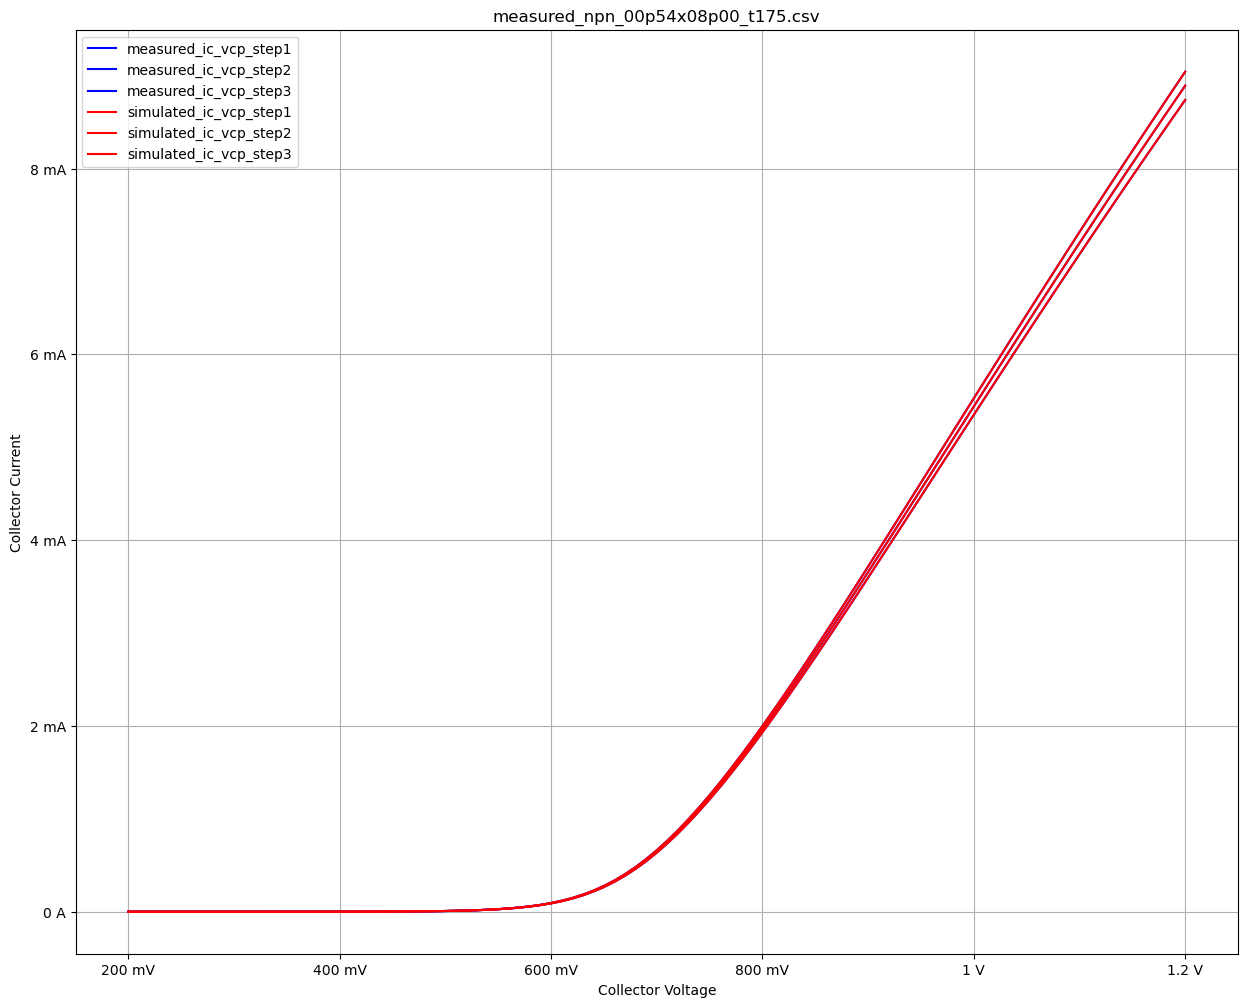

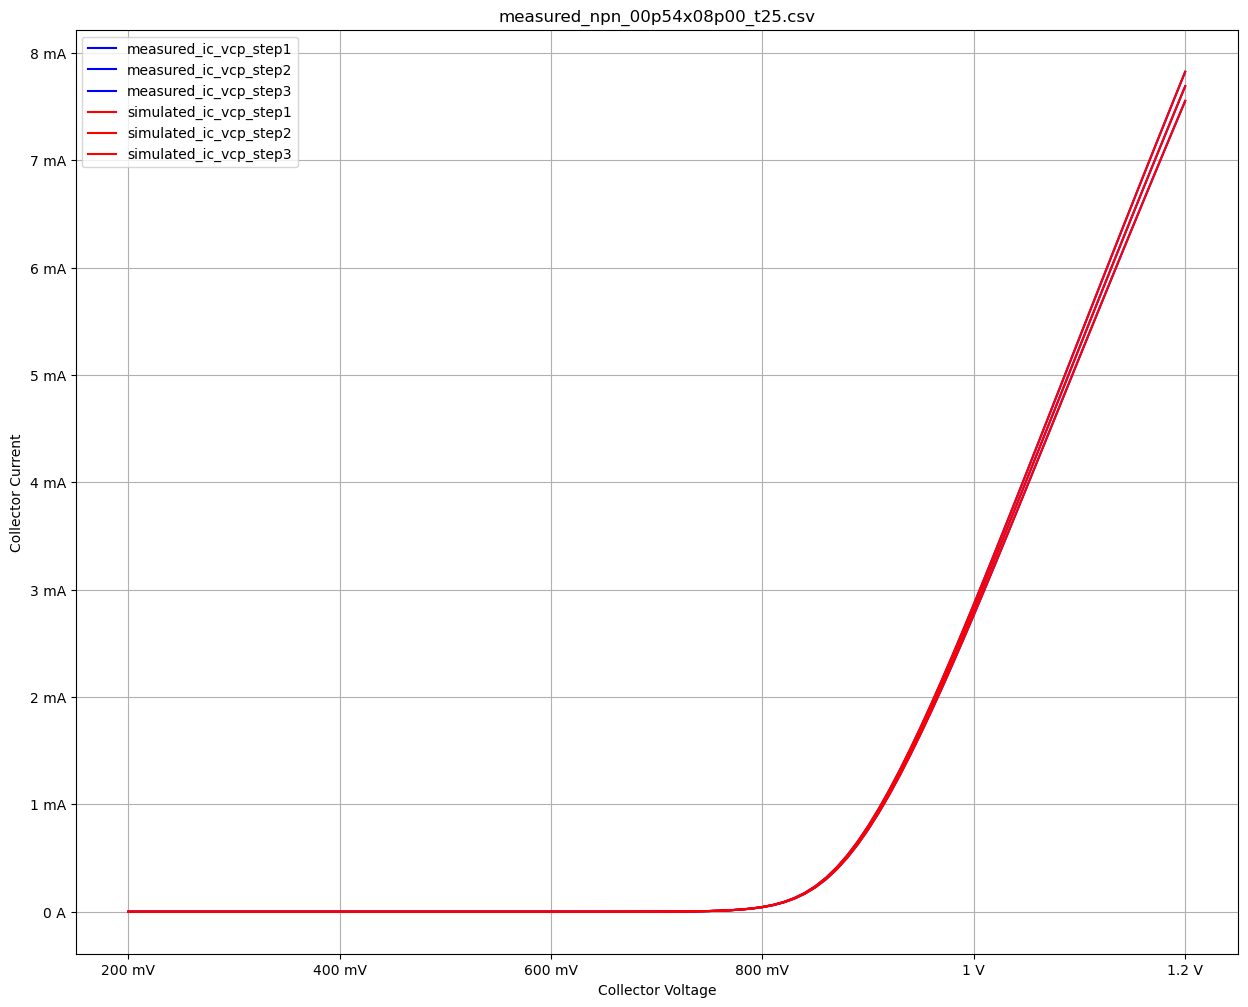

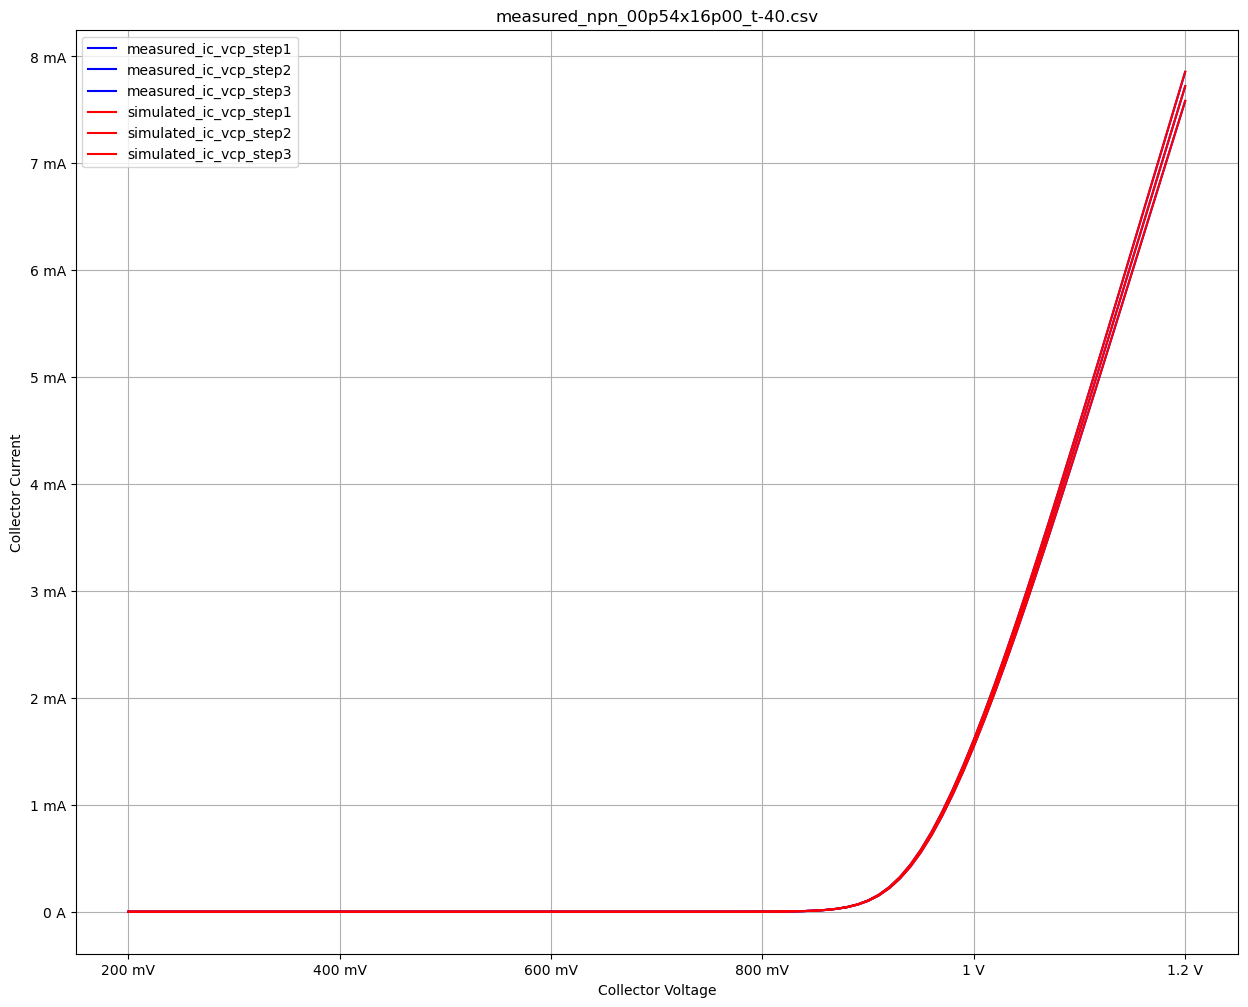

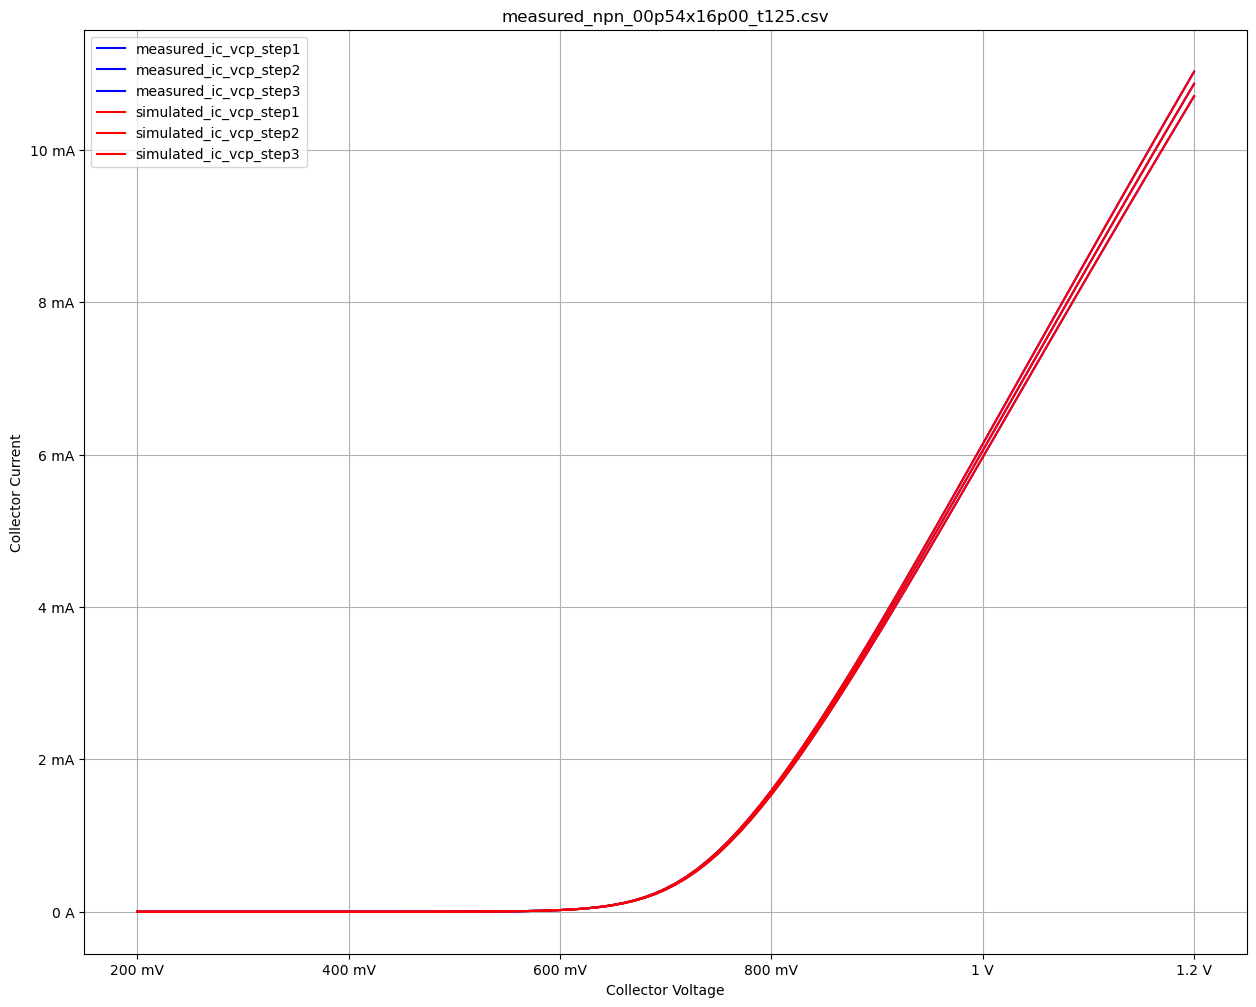

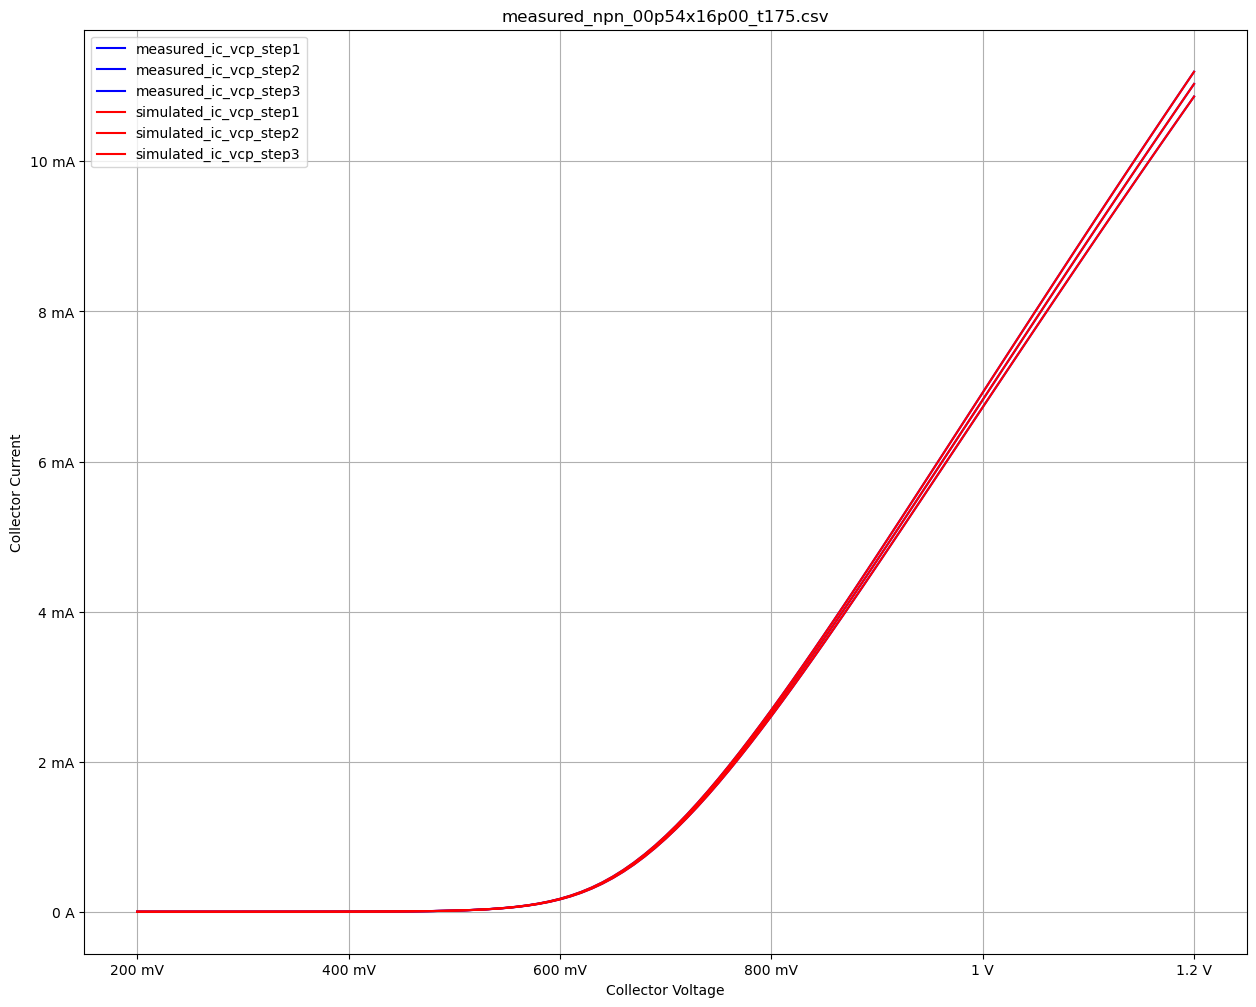

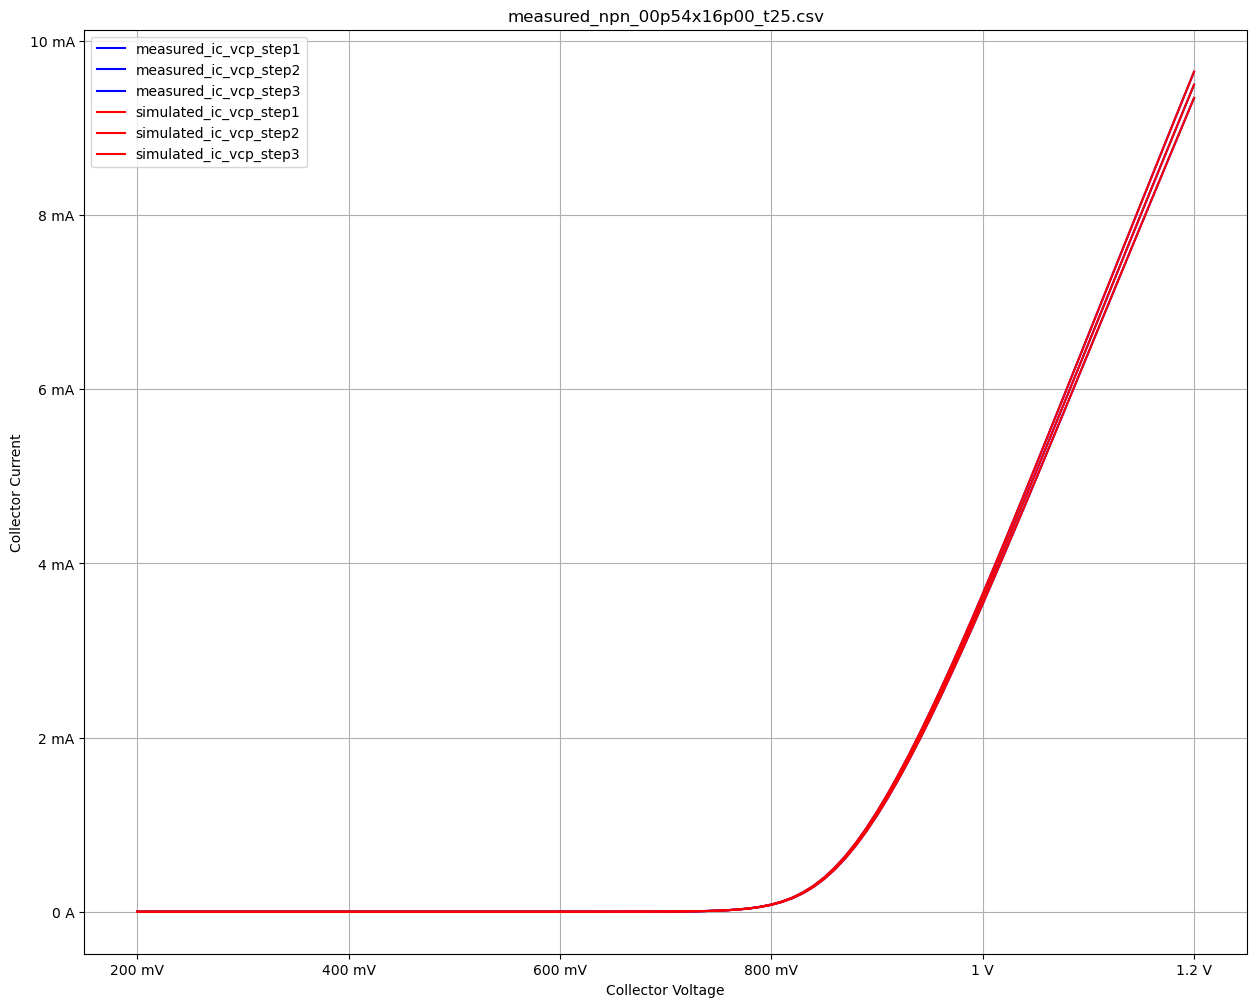

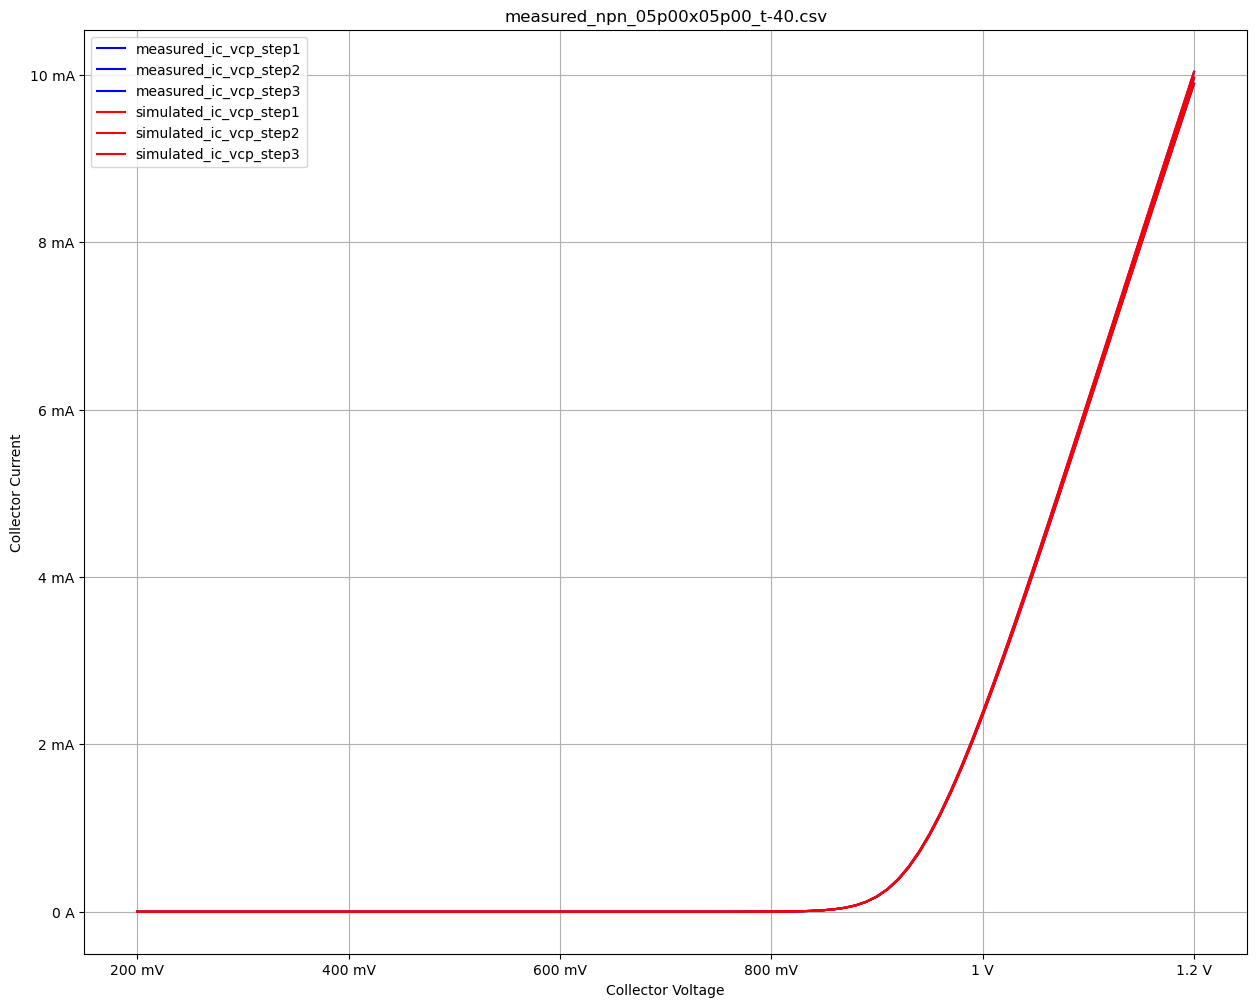

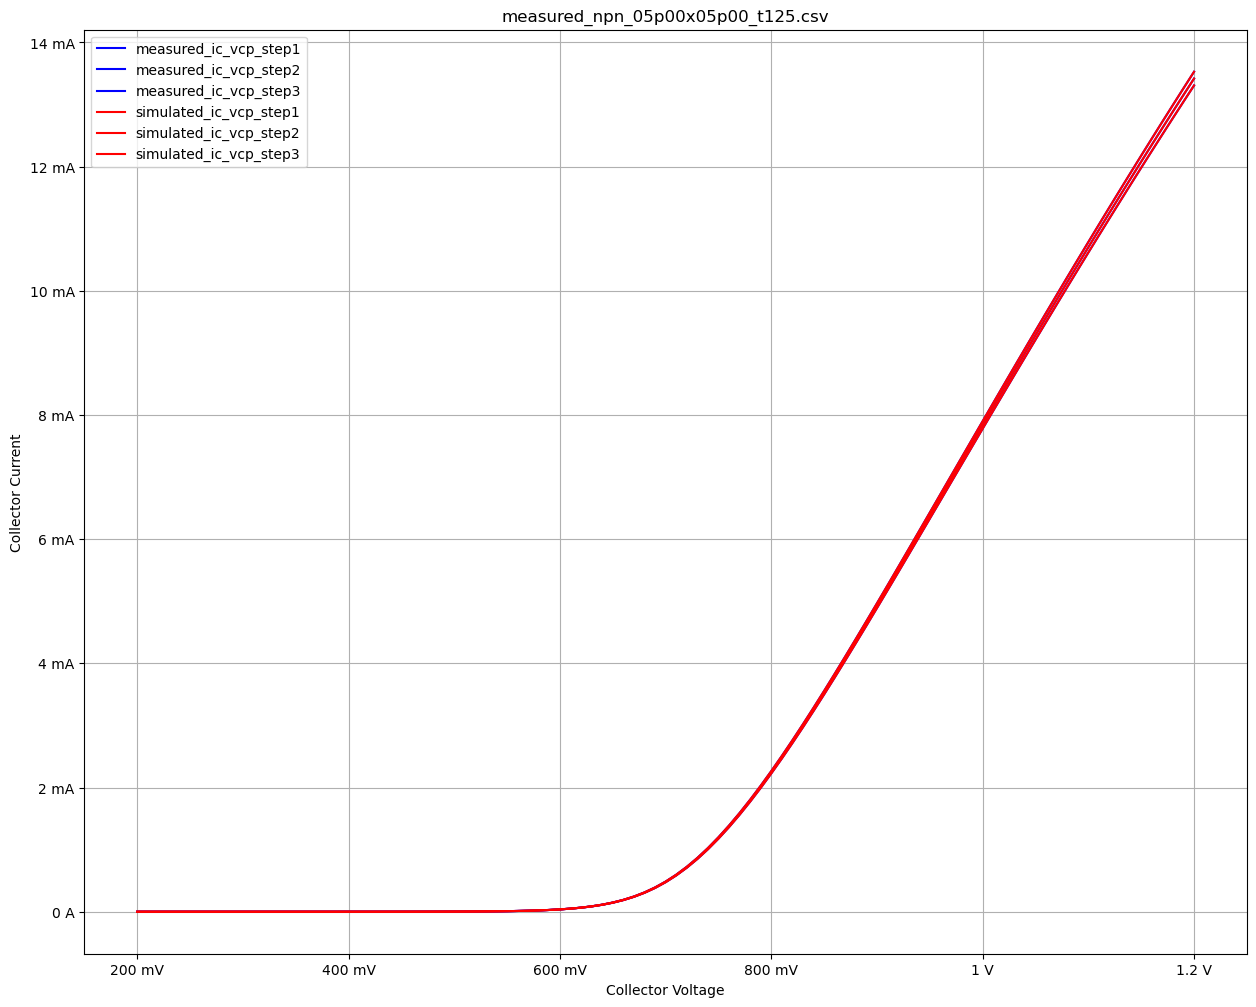

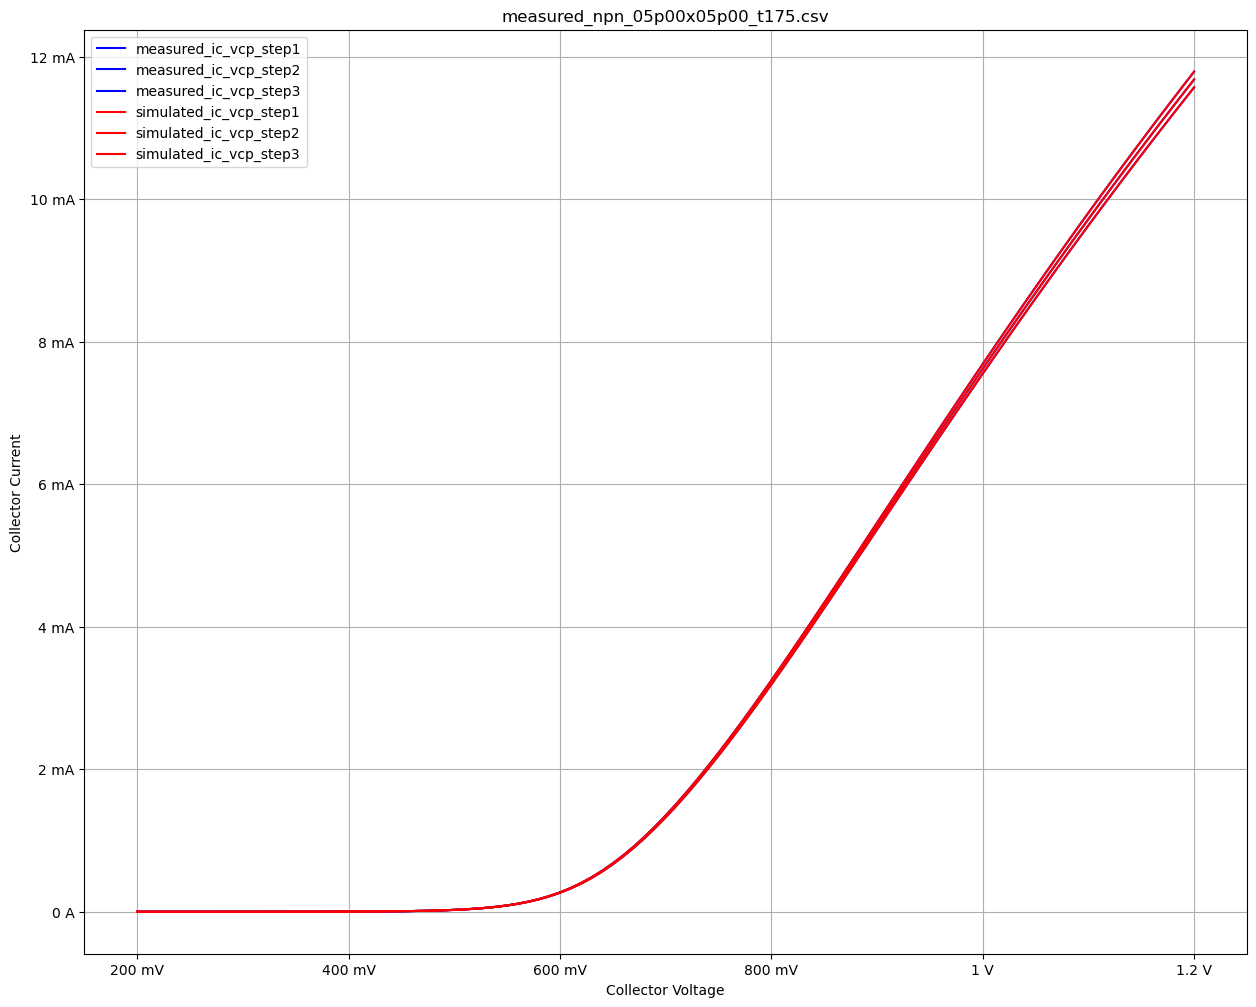

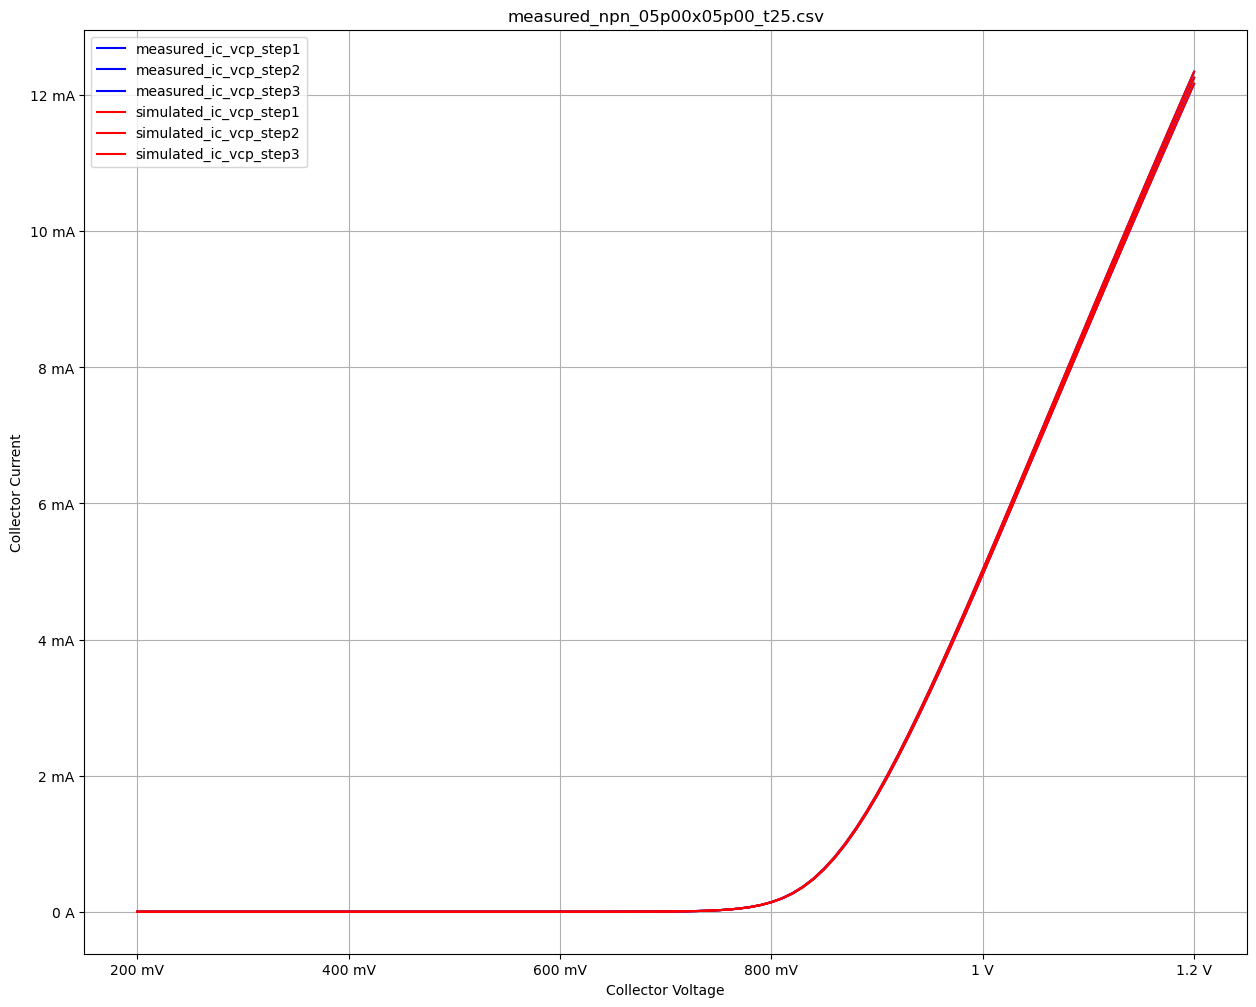

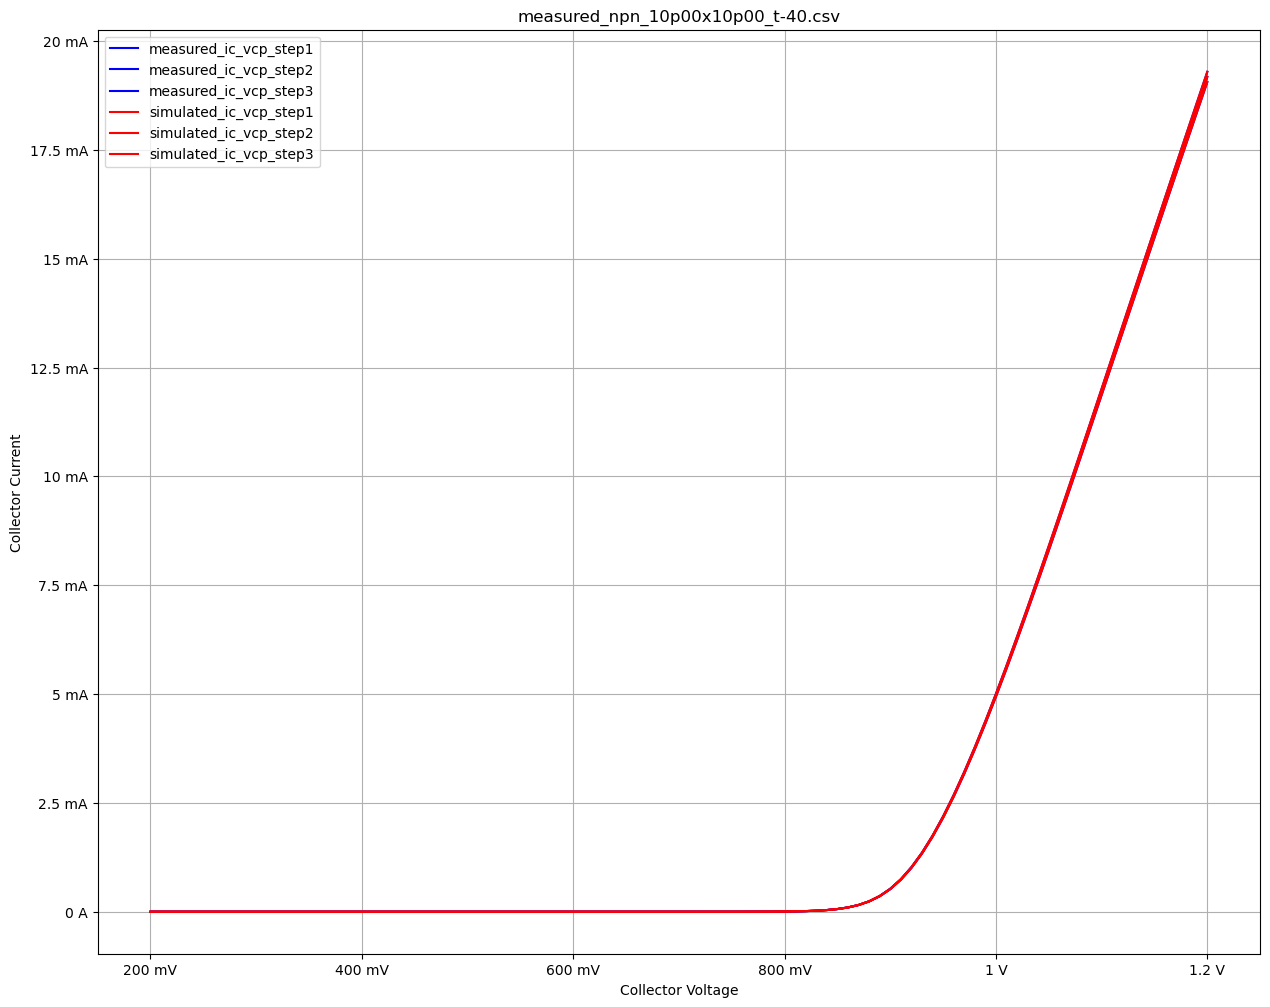

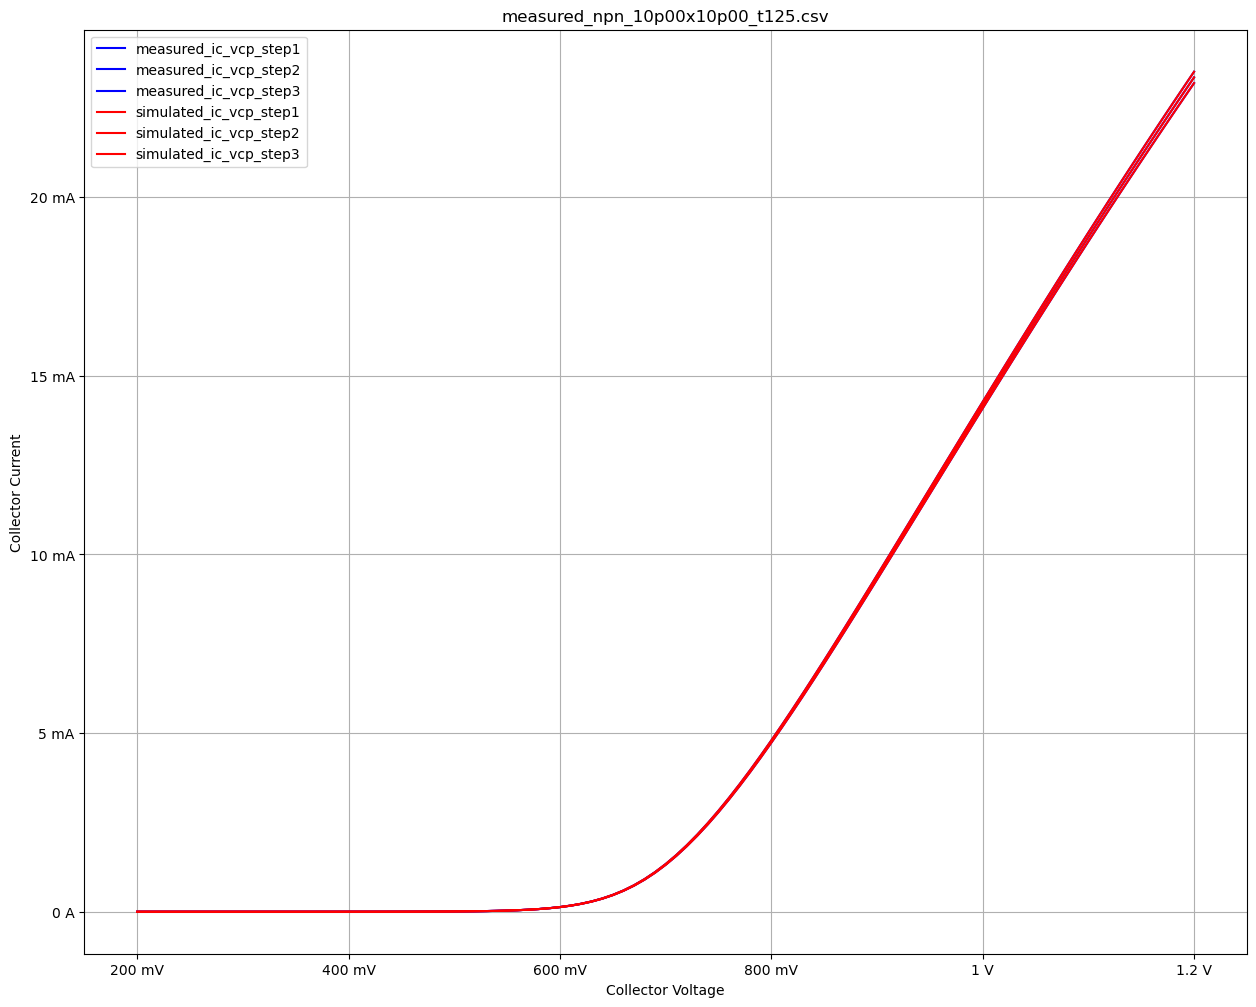

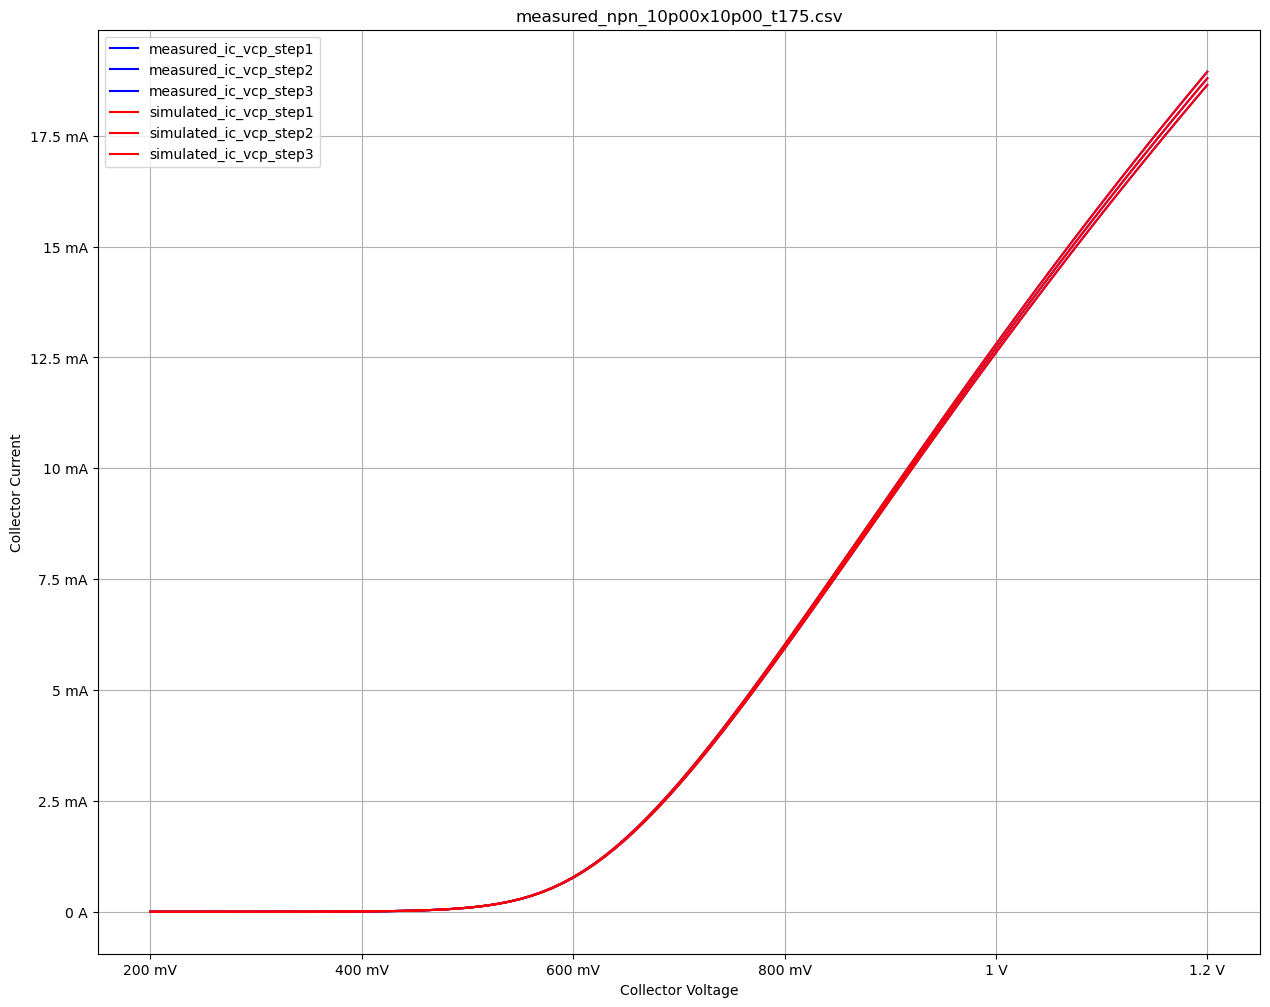

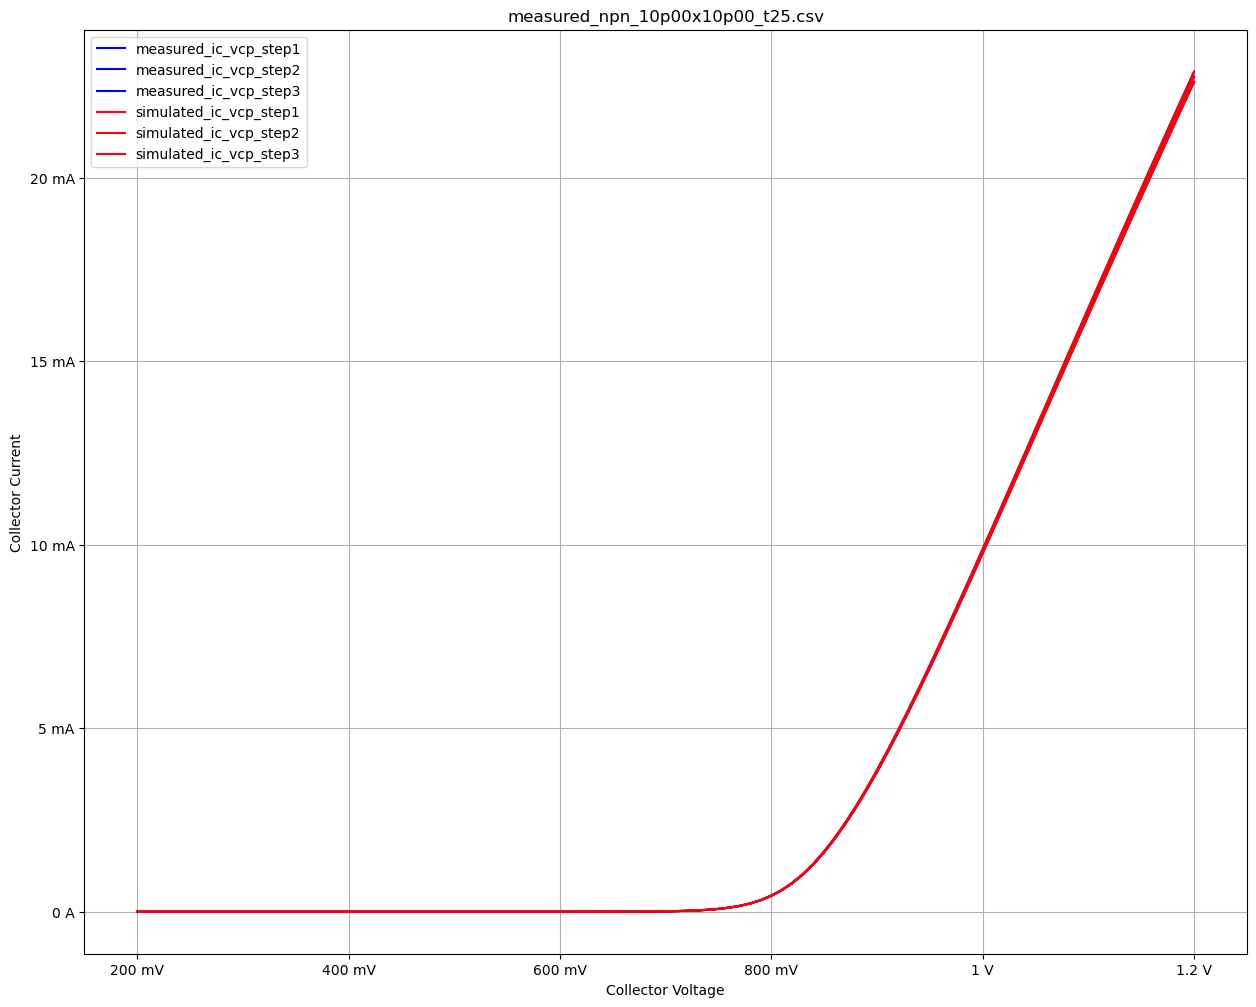

In [12]:
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter


def draw(measured, simulated):
    """draw func draw measured data vs simulated data

    Args:
        measured (list[str]): measured files paths
        simulated (list[str]): simulated files paths
    """    
    print("measured is blue")
    print("simulated is red")
    measured.sort()
    simulated.sort()
    for i in range(len(measured)):
        space = measured[i].rfind("/")
        read_dev_name = measured[i][space + 1:]
        df = pd.read_csv(measured[i])
        ax = df.plot(x=df.columns[1], y=df.columns[2:], color="b", figsize=(15,12))
        volt_formatter = EngFormatter(unit='V')
        amp_formatter = EngFormatter(unit='A')
        ax.xaxis.set_major_formatter(volt_formatter)
        ax.yaxis.set_major_formatter(amp_formatter)
        df = pd.read_csv(simulated[i])
        df.plot(ax=ax, x=df.columns[0], y=df.columns[1:], color="r")
        plt.title(read_dev_name)
        plt.grid()
        plt.xlabel('Collector Voltage')
        plt.ylabel('Collector Current')
    plt.show()


device = ["npn","pnp"]
# 1 for "pnp"
#  for "npn"
dev=0

measured_ib = glob.glob(f"bjt_beta_regr/{device[dev]}/ib_measured/*.csv")
simulated_ib = glob.glob(f"bjt_beta_regr/{device[dev]}/{device[dev]}_netlists/ib*.csv")

measured_ic = glob.glob(f"bjt_beta_regr/{device[dev]}/ic_measured/*.csv")
simulated_ic = glob.glob(f"bjt_beta_regr/{device[dev]}/{device[dev]}_netlists/ic*.csv")

draw(measured_ic, simulated_ic)
# draw(measured_ib,simulated_ib,device)
